In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import seaborn as sns
import networkx as nx
import matplotlib.colors as mcolors
from scipy import stats
# pd.options.display.max_rows = None
# pd.options.display.max_columns = None
import glob as glob
import math
pd.set_option('display.max_rows', None)  # To display all rows
pd.set_option('display.max_columns', None)  # To display all columns
from scipy.stats import shapiro

In [112]:
gm_2q = pd.read_csv('graph_metrics_adni_a4_bootstrapped_2quant.csv')
gm_3q = pd.read_csv('graph_metrics_adni_a4_bootstrapped_3quant.csv')

In [113]:
print(gm_3q['Centiloid Quantile'].unique())
print(gm_2q['Centiloid Quantile'].unique())

[0 1 2]
[0 1 2]


In [114]:
print(gm_3q.head())

  Dataset  Centiloid Quantile  Weighted Clustering Coefficient  \
0    ADNI                   0                         0.081535   
1    ADNI                   0                         0.073002   
2    ADNI                   0                         0.079084   
3    ADNI                   0                         0.074084   
4    ADNI                   0                         0.072080   

   Weighted Avg. Shortest Path Length  Weighted Small World  
0                            2.335027              0.321469  
1                            2.219996              0.336764  
2                            2.244031              0.360254  
3                            2.350956              0.294698  
4                            2.321454              0.287563  


I. subdivide adni and a4 from gm3q df 


In [115]:
adni_gm = gm_3q[gm_3q['Dataset']=='ADNI']
a4_gm = gm_3q[gm_3q['Dataset']=='A4']

In [116]:
print(adni_gm['Dataset'].nunique()) #looks good
print(a4_gm['Dataset'].nunique())

1
1


II. Visualize the distributions of the graph metrics to know what statistical tests are apprporiate 
* Weighted clustering coefficient 
* Weighted average path length
* Weighted small world coefficient 

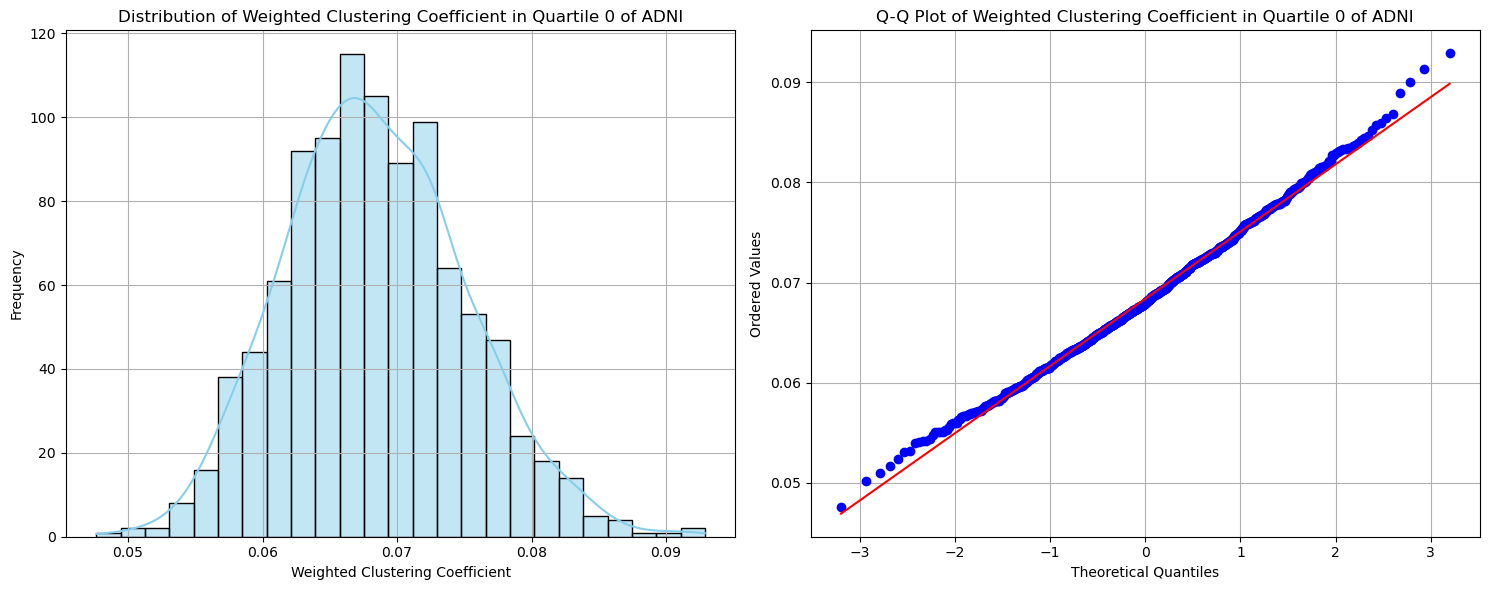

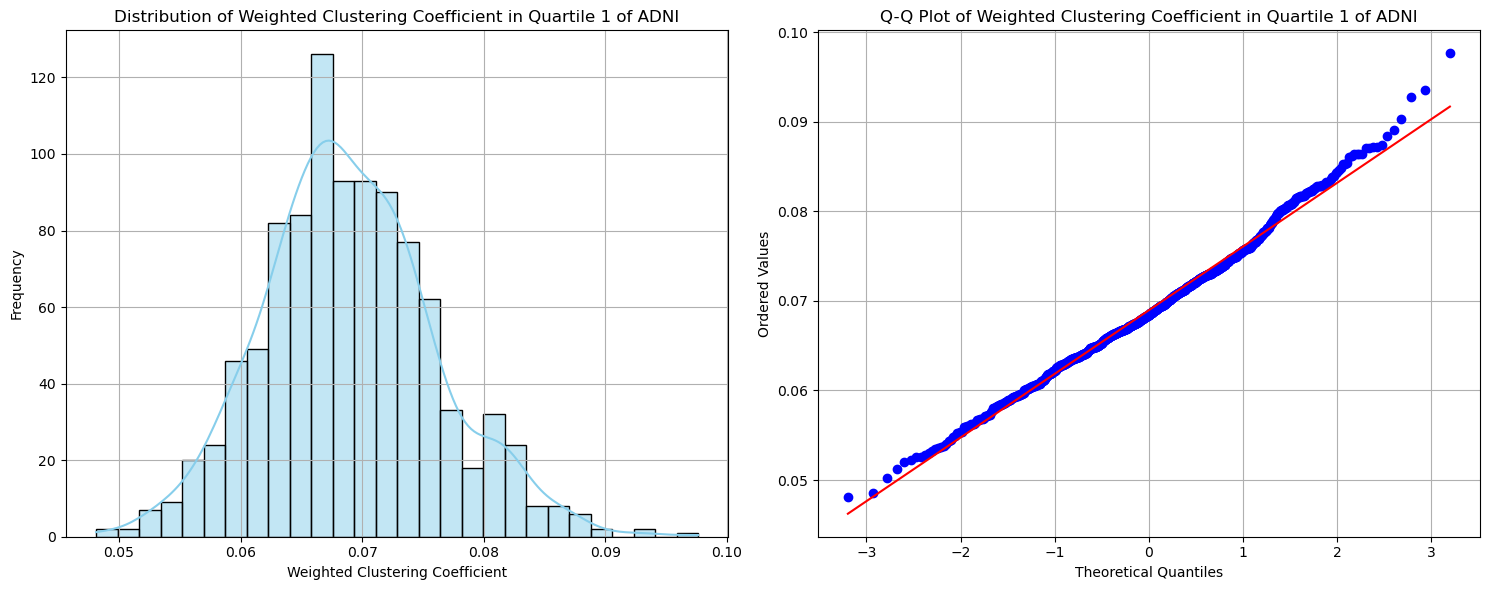

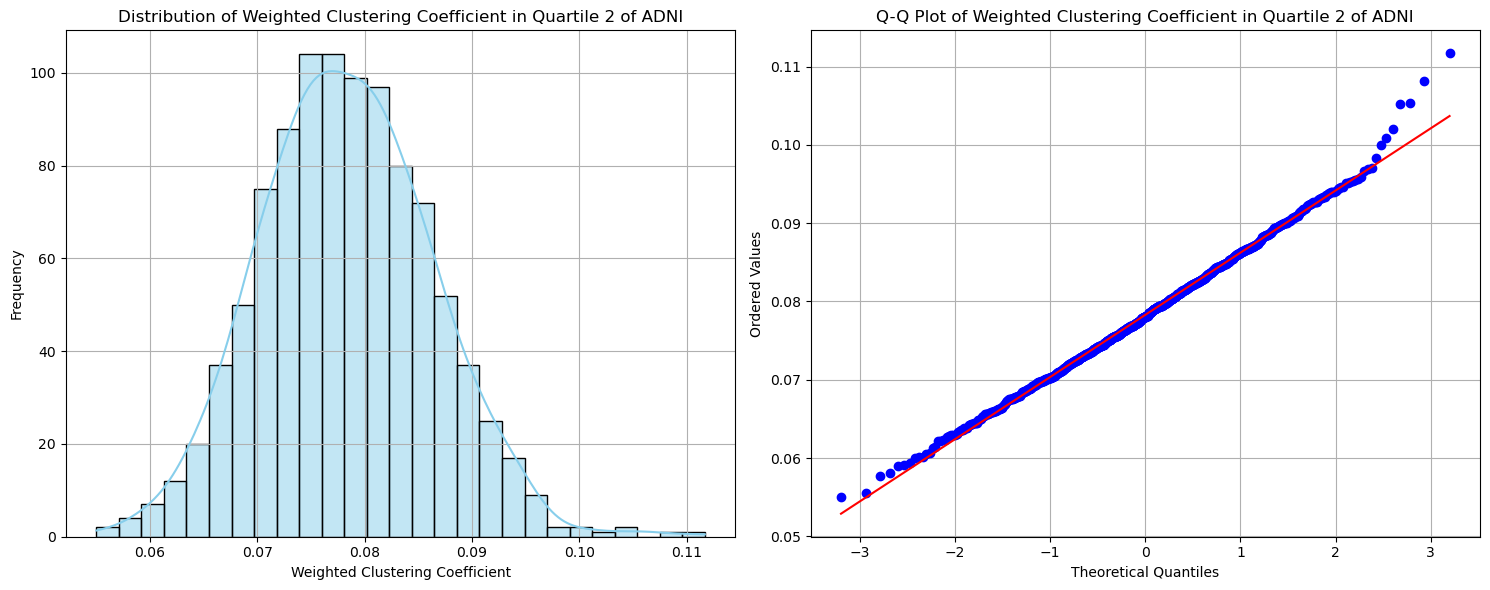

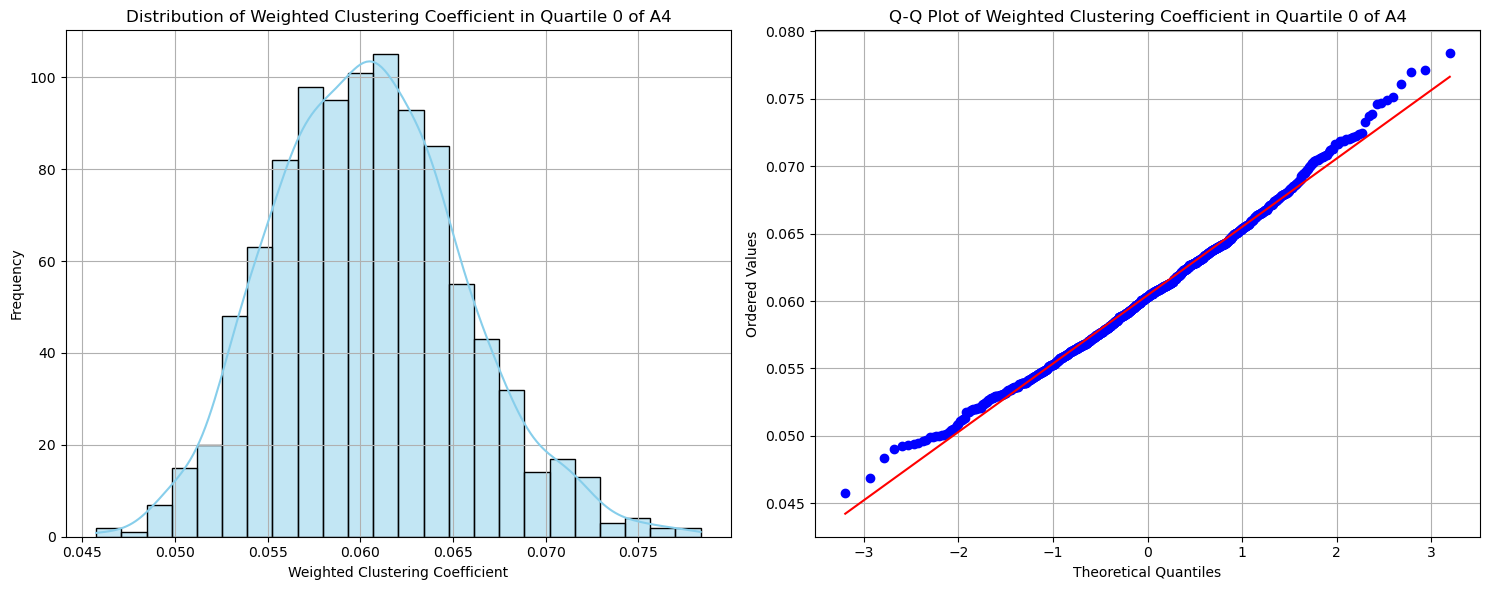

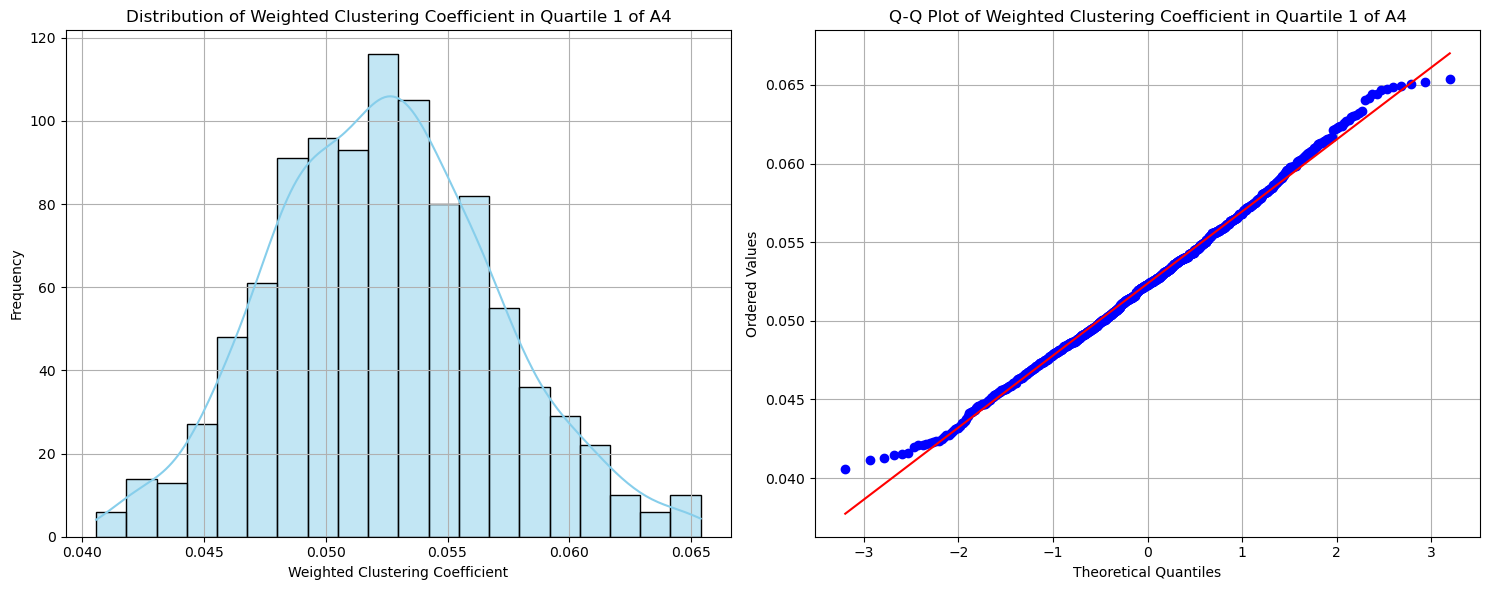

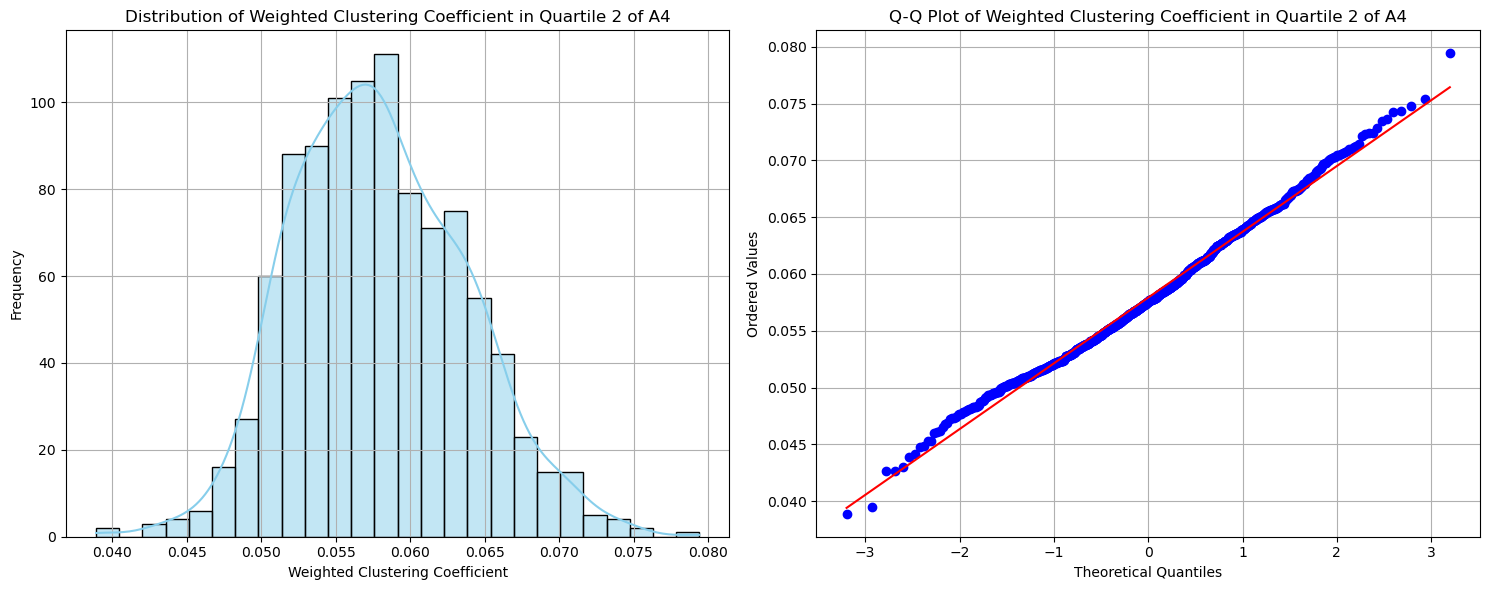

In [117]:
def plot_weighted_clustering_coefficient(df):
    # Extracting the dataset name from the 'Dataset' column of the first row
    dataset_name = df['Dataset'].iloc[0]
    
    # Grouping DataFrame by 'CENTILOID QUARTILE'
    quartile_groups = df.groupby('Centiloid Quantile')
    
    # Iterate through each quartile group
    for quartile, group_df in quartile_groups:
        # Setting up the matplotlib figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Histogram Plot
        sns.histplot(group_df['Weighted Clustering Coefficient'], kde=True, color='skyblue', ax=ax1)
        ax1.set_title(f'Distribution of Weighted Clustering Coefficient in Quartile {quartile} of {dataset_name}')
        ax1.set_xlabel('Weighted Clustering Coefficient')
        ax1.set_ylabel('Frequency')
        ax1.grid(True)
        
        # Q-Q Plot
        stats.probplot(group_df['Weighted Clustering Coefficient'], dist="norm", plot=ax2)
        ax2.set_title(f'Q-Q Plot of Weighted Clustering Coefficient in Quartile {quartile} of {dataset_name}')
        ax2.set_xlabel('Theoretical Quantiles')
        ax2.set_ylabel('Ordered Values')
        ax2.grid(True)
        
        # Adjusting layout
        plt.tight_layout()
        plt.show()

# Assuming 'adni' and 'a4' are your DataFrames
plot_weighted_clustering_coefficient(adni_gm)
plot_weighted_clustering_coefficient(a4_gm)


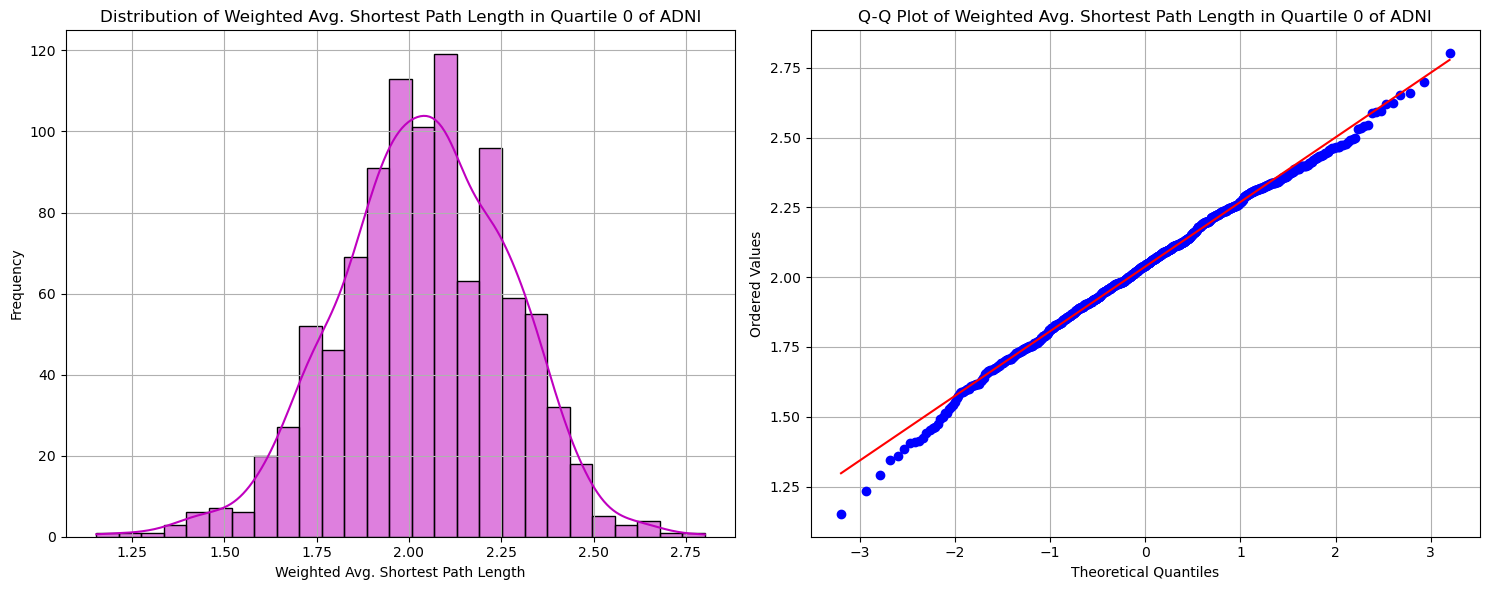

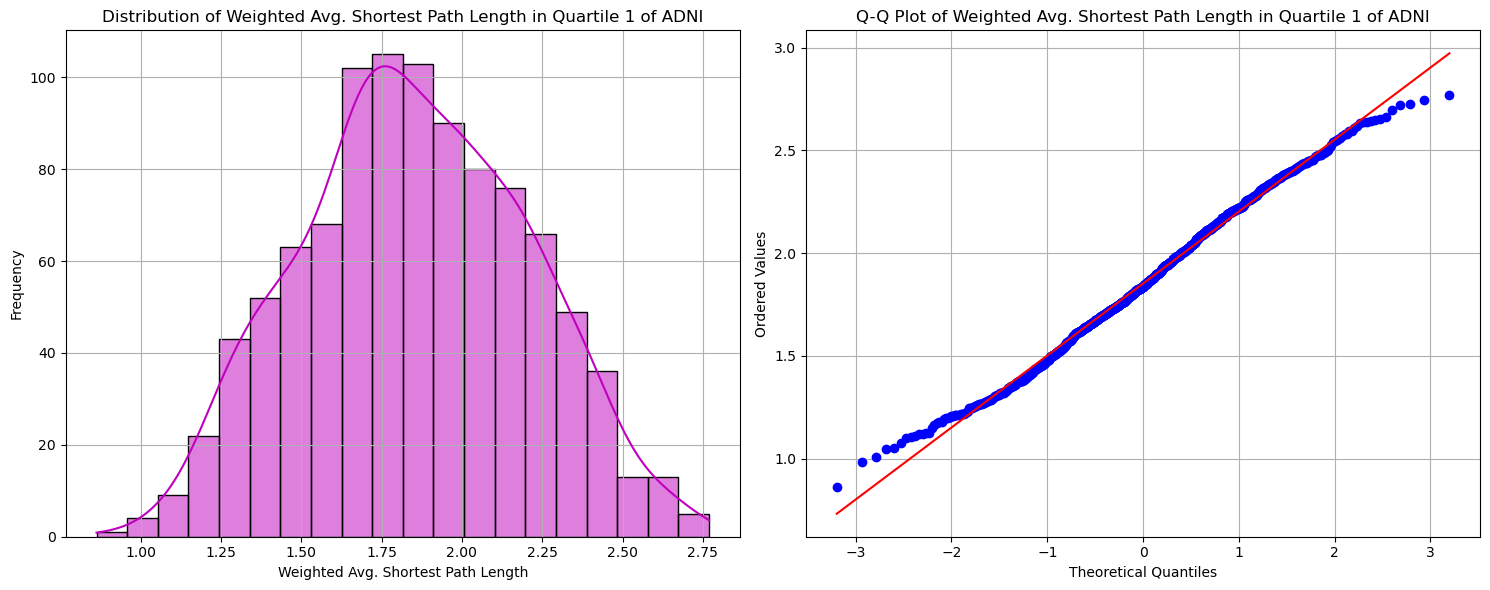

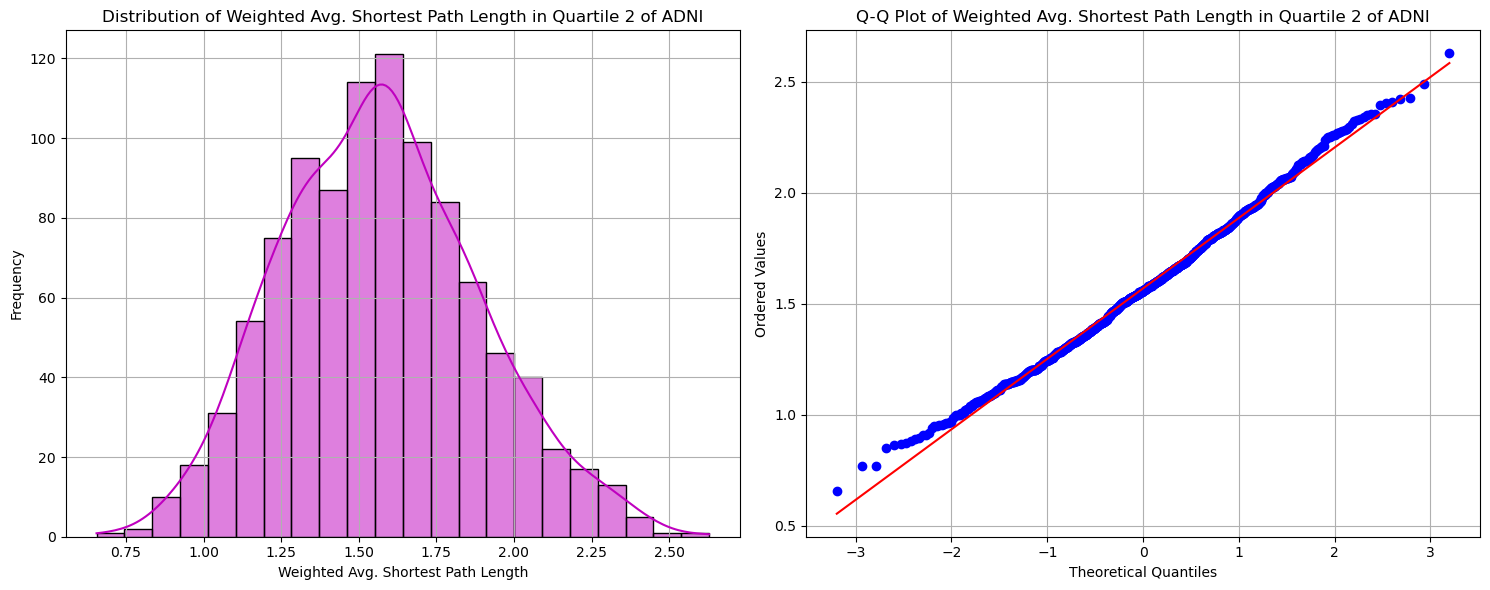

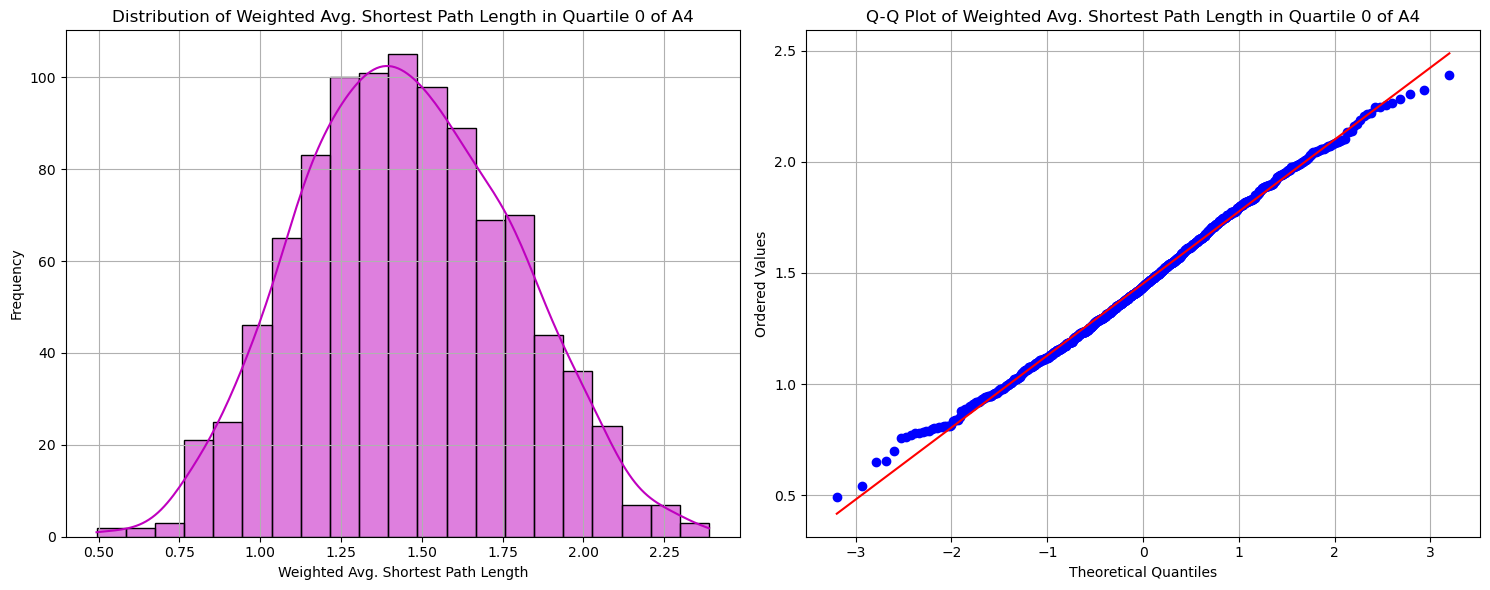

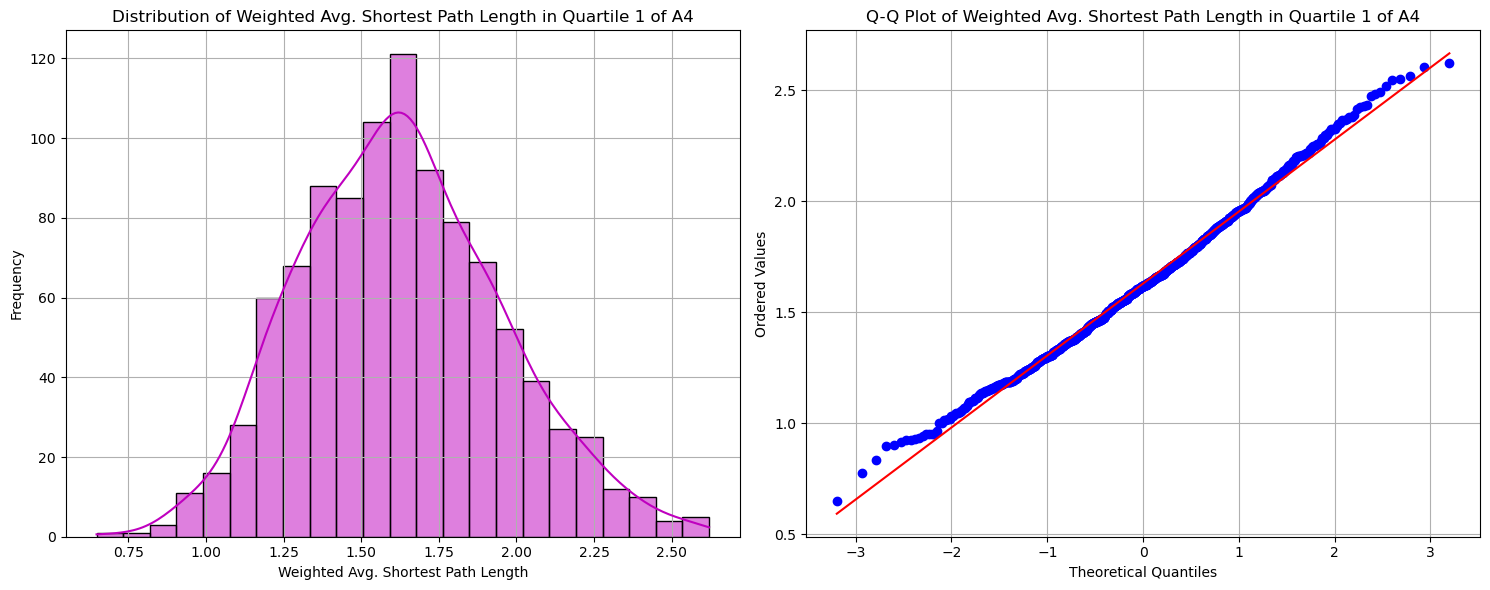

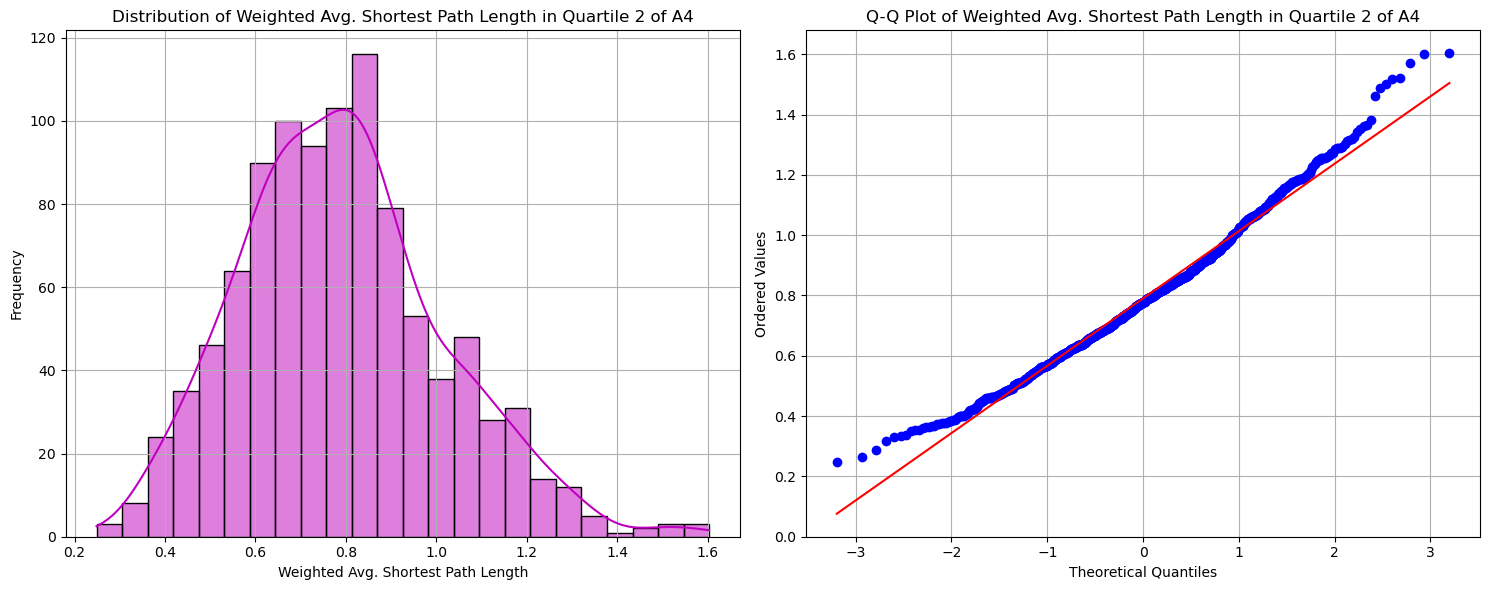

In [118]:

def plot_aspl(df):
    # Extracting the dataset name from the 'Dataset' column of the first row
    dataset_name = df['Dataset'].iloc[0]  
    
    # Grouping DataFrame by 'CENTILOID QUARTILE'
    quartile_groups = df.groupby('Centiloid Quantile')
    
    # Iterate through each quartile group
    for quartile, group_df in quartile_groups:
        # Setting up the matplotlib figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Histogram Plot
        sns.histplot(group_df['Weighted Avg. Shortest Path Length'], kde=True, color='m', ax=ax1)
        ax1.set_title(f'Distribution of Weighted Avg. Shortest Path Length in Quartile {quartile} of {dataset_name}')
        ax1.set_xlabel('Weighted Avg. Shortest Path Length')
        ax1.set_ylabel('Frequency')
        ax1.grid(True)
        
        # Q-Q Plot
        stats.probplot(group_df['Weighted Avg. Shortest Path Length'], dist="norm", plot=ax2)
        ax2.set_title(f'Q-Q Plot of Weighted Avg. Shortest Path Length in Quartile {quartile} of {dataset_name}')
        ax2.set_xlabel('Theoretical Quantiles')
        ax2.set_ylabel('Ordered Values')
        ax2.grid(True)
        
        # Adjusting layout
        plt.tight_layout()
        plt.show()

# Assuming 'adni' and 'a4' are your DataFrames
plot_aspl(adni_gm)
plot_aspl(a4_gm)


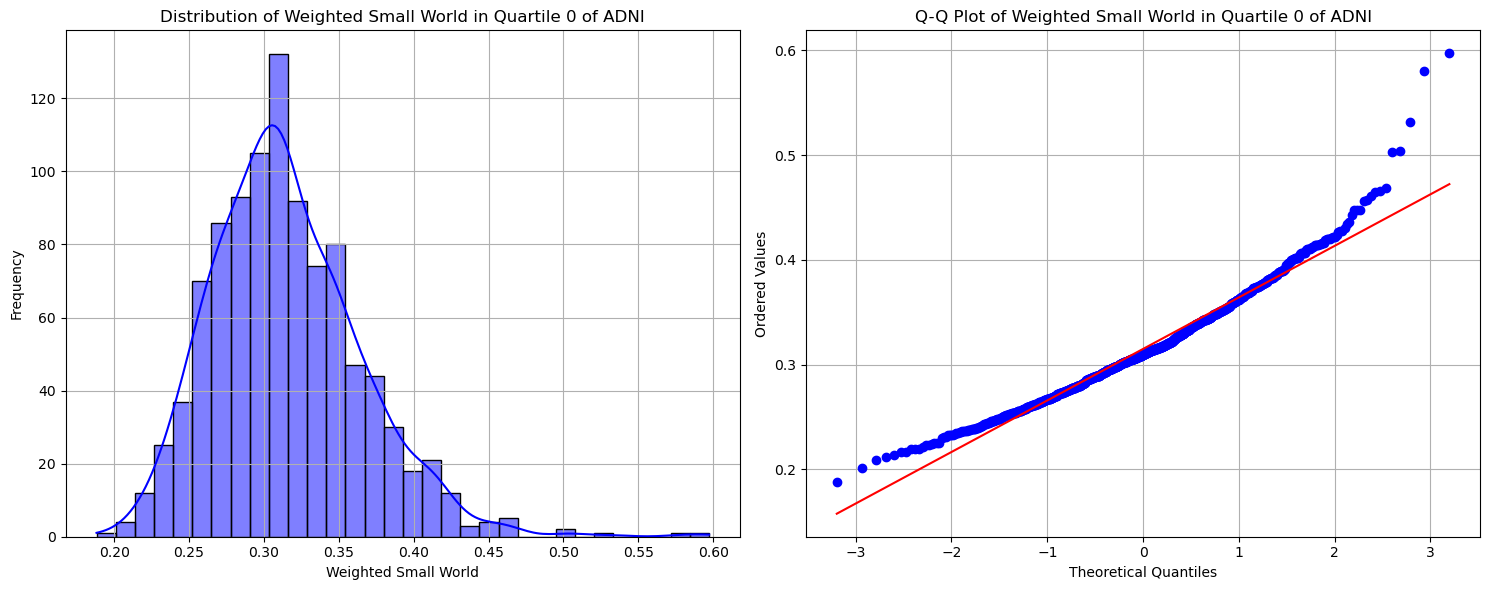

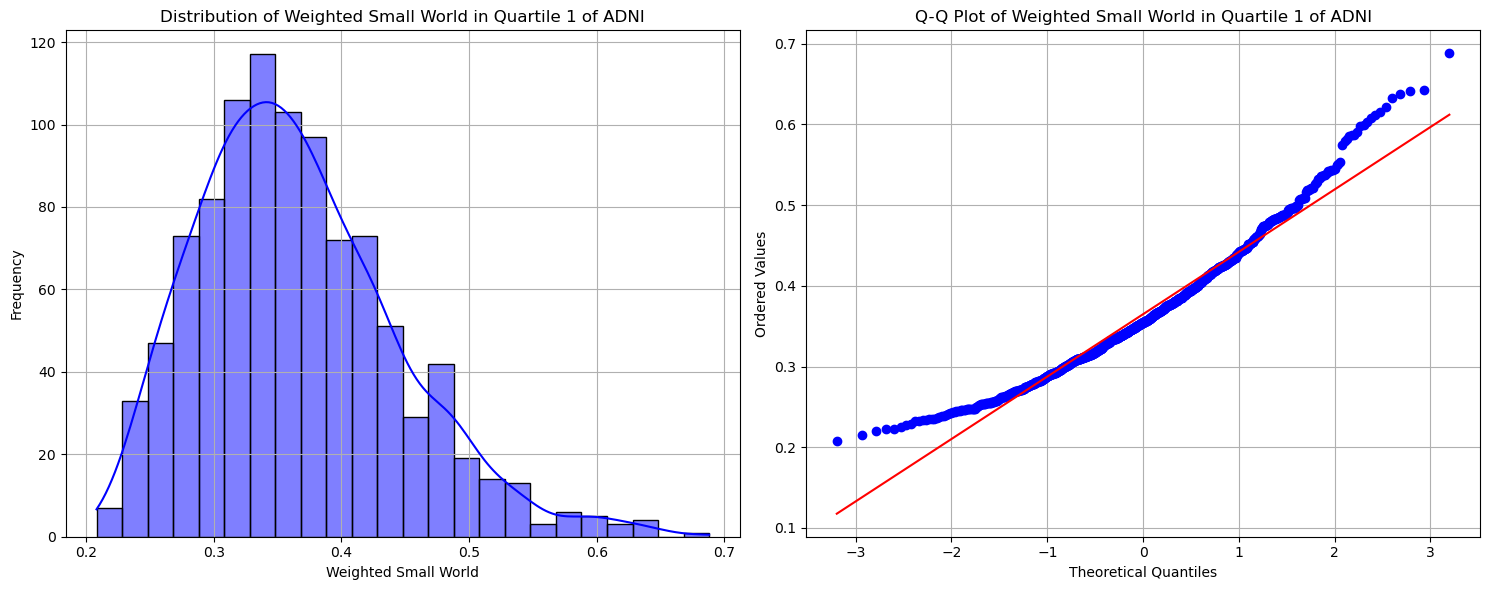

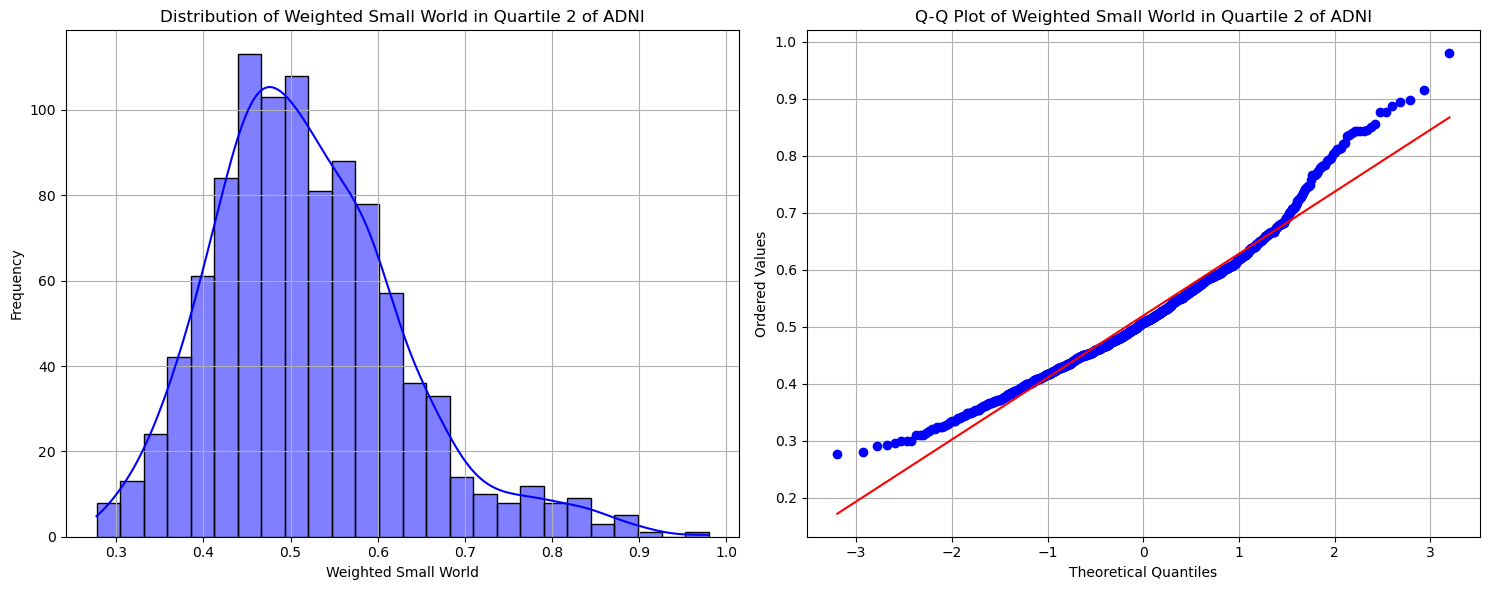

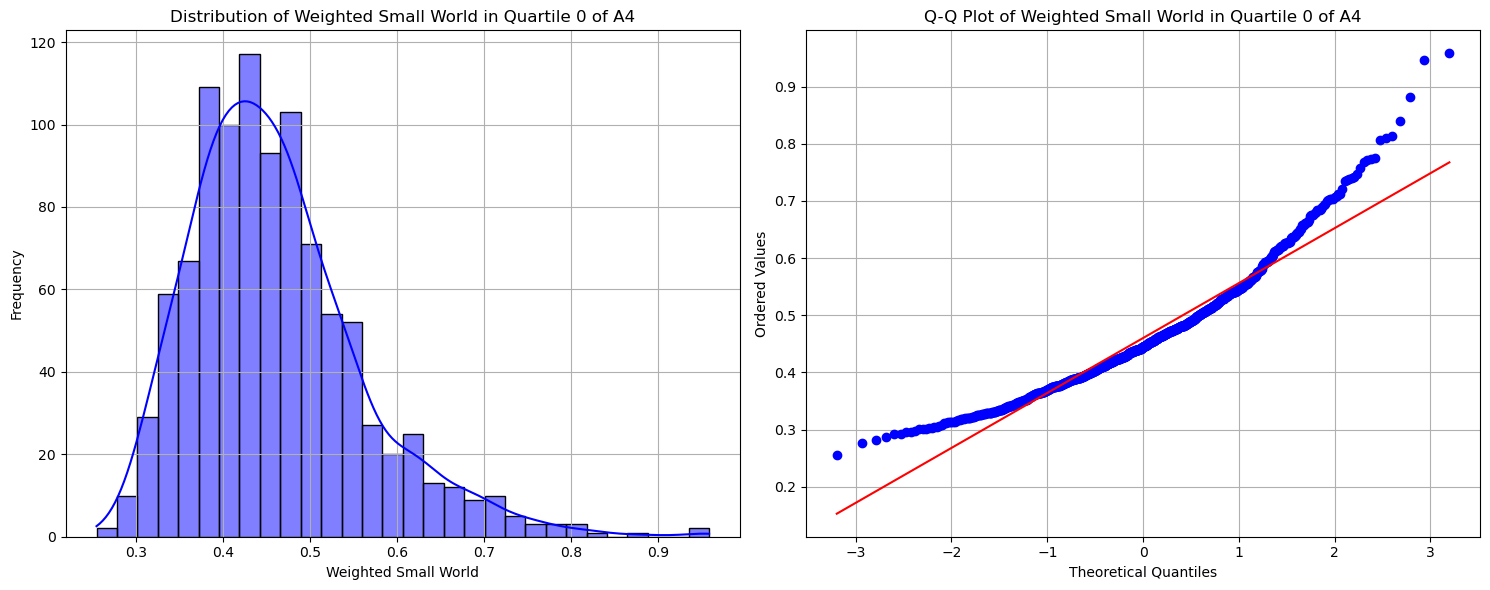

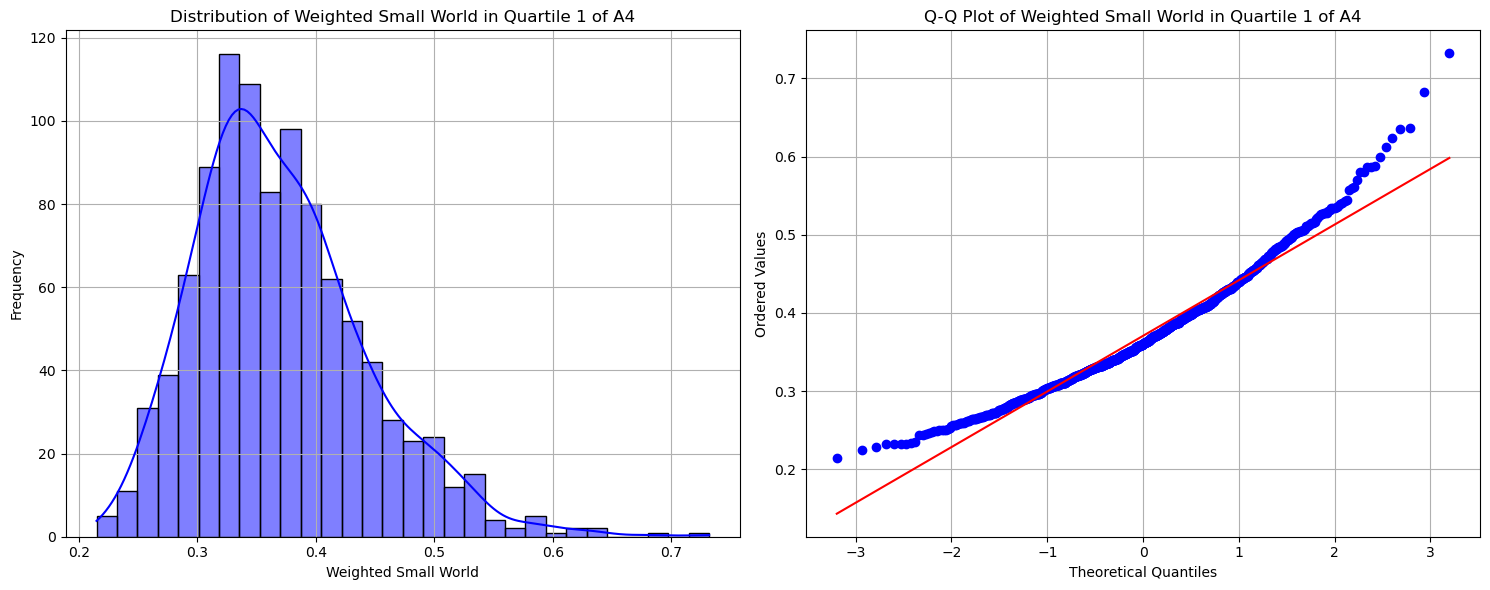

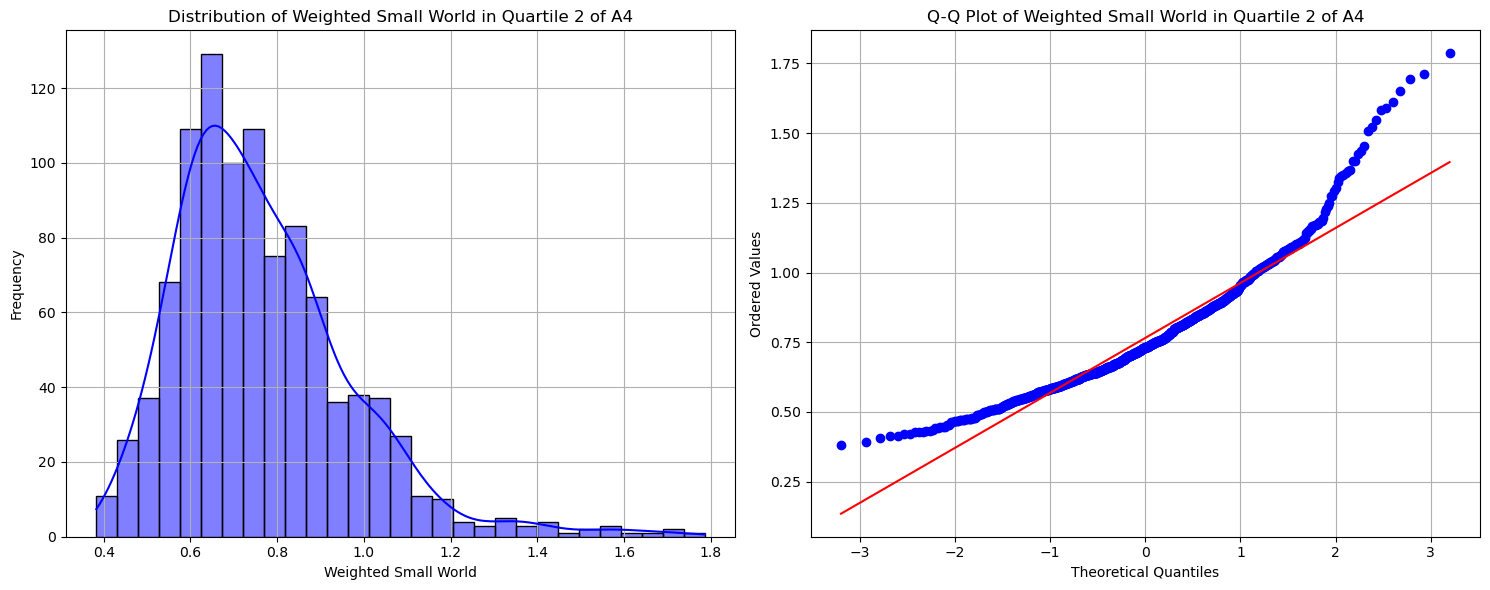

In [119]:

def wsw_hist(df):
    # Extracting the dataset name from the 'Dataset' column of the first row
    dataset_name = df['Dataset'].iloc[0]  
    
    # Grouping DataFrame by 'CENTILOID QUARTILE'
    quartile_groups = df.groupby('Centiloid Quantile')
    
    # Iterate through each quartile group
    for quartile, group_df in quartile_groups:
        # Setting up the matplotlib figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Histogram Plot
        sns.histplot(group_df['Weighted Small World'], kde=True, color='blue', ax=ax1)
        ax1.set_title(f'Distribution of Weighted Small World in Quartile {quartile} of {dataset_name}')
        ax1.set_xlabel('Weighted Small World')
        ax1.set_ylabel('Frequency')
        ax1.grid(True)
        
        # Q-Q Plot
        stats.probplot(group_df['Weighted Small World'], dist="norm", plot=ax2)
        ax2.set_title(f'Q-Q Plot of Weighted Small World in Quartile {quartile} of {dataset_name}')
        ax2.set_xlabel('Theoretical Quantiles')
        ax2.set_ylabel('Ordered Values')
        ax2.grid(True)
        
        # Adjusting layout
        plt.tight_layout()
        plt.show()

# Assuming 'adni' and 'a4' are your DataFrames
wsw_hist(adni_gm)
wsw_hist(a4_gm)
